# Solution for Question5

In [78]:
import numpy as np
import pandas as pd
import glob
import cv2
import matplotlib.pyplot as plt
import random

In [58]:
# traversethe image

path = glob.glob("./Dataset/5/*.jpg")
cv_img = []
for img in path:
    n = cv2.imread(img)
    print(n.shape)
    cv_img.append(n)

(799, 547, 3)
(600, 800, 3)
(600, 584, 3)


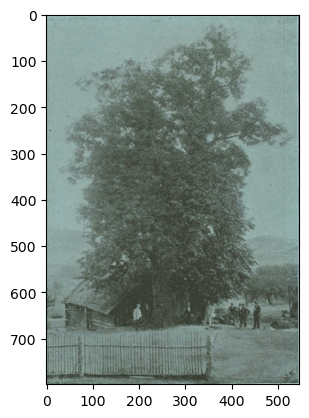

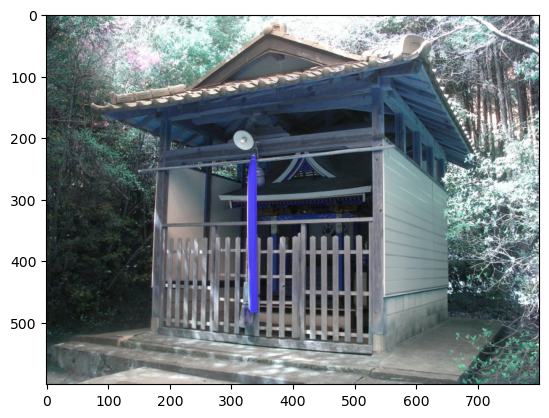

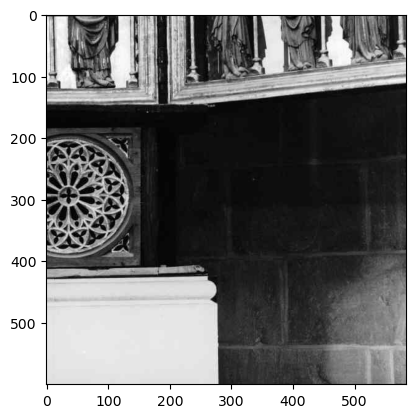

In [59]:
for i in cv_img:
    plt.imshow(i)
    plt.show()

## A.Resize all the image

In [60]:
for l,i in enumerate(cv_img):
    cv_img[l]=cv2.resize(i,(256,256))

In [61]:
#checking the size of each image:
for i in cv_img:
    print(i.shape)

(256, 256, 3)
(256, 256, 3)
(256, 256, 3)


## Converting into gray scle

In [62]:
gray_cv_img=[]
for l,i in enumerate(cv_img):
    gray_cv_img.append(cv2.cvtColor(i, cv2.COLOR_BGR2GRAY))

In [64]:
for i in gray_cv_img:
    print(i.shape)

(256, 256)
(256, 256)
(256, 256)


## B.Average of all three images.

In [65]:

avg_img=np.mean(cv_img,axis=0)

In [68]:
avg_img = avg_img.astype('int32')
avg_img.shape

(256, 256, 3)

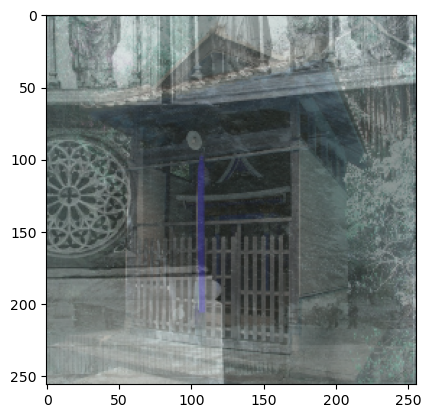

In [69]:
plt.imshow(avg_img)
plt.show()

## Second methode for the average

In [70]:
dst = cv_img[0]
for i in range(len(cv_img)):
    if i == 0:
        pass
    else:
        alpha = 1.0/(i + 1)
        beta = 1.0 - alpha
        dst = cv2.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

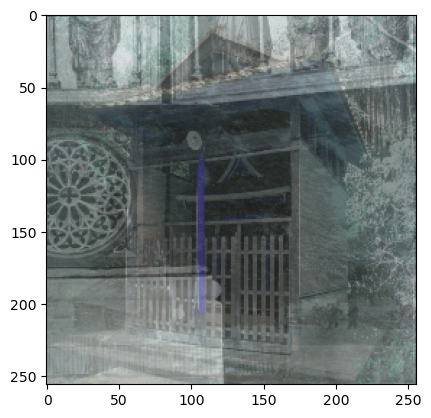

In [71]:
plt.imshow(dst)
plt.show()

## Substract image1 to image2

In [72]:
# substraction done after the conversion into gray scale and resize into 256*256
subtracted = cv2.subtract(cv_img[0], cv_img[1])

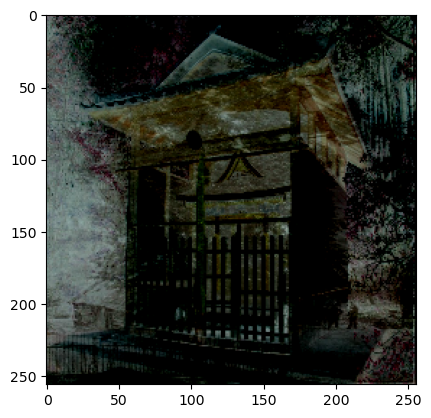

In [73]:
plt.imshow(subtracted)
plt.show()

## D. Adding salt noise with 5% probability

### Noise
Adding random disturbance into the image is known as image noise.
salt and pepper noise:
1. Salt(White) noise adding into the dark region.
2. Pepper(Black) noise adding into the white region.
3. Salt and pepper noise are added to the gray scale image


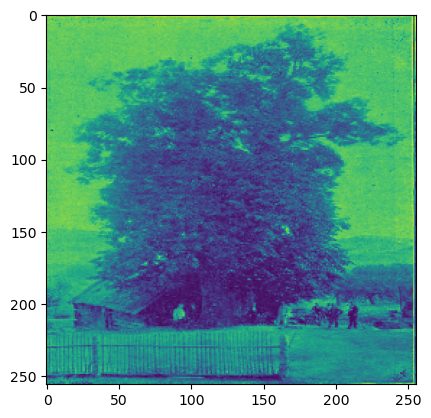

In [80]:
height, width= gray_cv_img[0].shape
salt_img=gray_cv_img[0]
plt.imshow(salt_img)
plt.show()

In [81]:
print(height,width)

256 256


In [82]:
# adding the salt noise
size=int((256*256)*(5/100))

In [83]:
for i in range(size):
    y_cord=random.randint(0,height-1)
    x_cord=random.randint(0,width-1)
    salt_img[y_cord][x_cord]=255
    
    

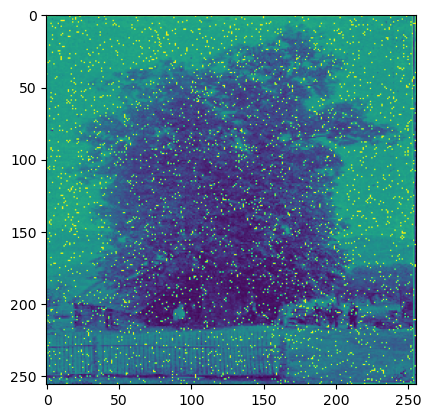

In [84]:
plt.imshow(salt_img)
plt.show()

## E. Removing the salt noise
Median_Filter: Median filter is used to remove the salt and pepper noise.


In [85]:
noise_free_img=cv2.medianBlur(salt_img,5)

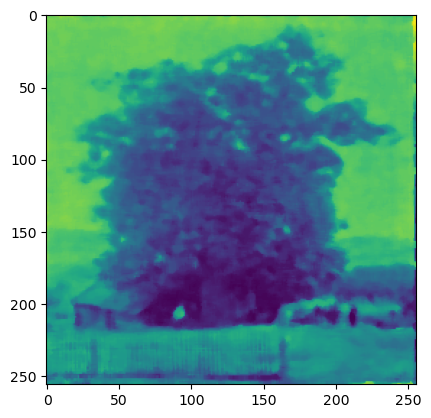

In [86]:
plt.imshow(noise_free_img)
plt.show()

## Applying the convolutional on image
{−1, −1, −1; 0, 0, 0; 1, 1, 1}




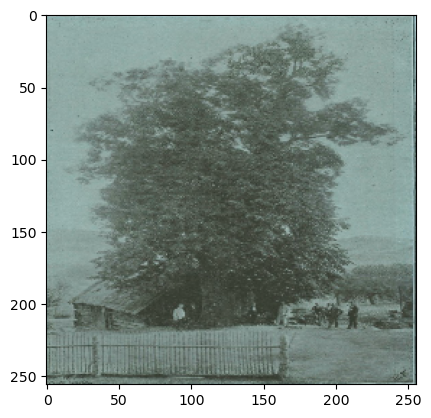

In [91]:
cnv_img=cv_img[0]
plt.imshow(cnv_img)
plt.show()

In [92]:
print(cnv_img.shape)

(256, 256, 3)


In [97]:
kernel=np.array([[-1, -1, -1],[0, 0, 0],[1, 1, 1]],dtype='float64')

In [98]:
kernel

array([[-1., -1., -1.],
       [ 0.,  0.,  0.],
       [ 1.,  1.,  1.]])

In [100]:
dst=cv2.filter2D(cnv_img,-1,kernel)

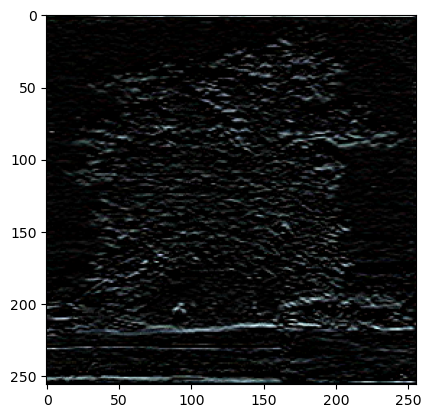

In [101]:
plt.imshow(dst)
plt.show()